In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import math
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from pprint import pprint

In [2]:
actors_df = pd.read_csv("Craig_portion/Resources/tmdb_5000_credits.csv")
actors_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
movies = pd.read_csv("Craig_portion/Resources/tmdb_5000_movies.csv")
movies_df = pd.DataFrame(movies)
movies_df=movies_df.rename(columns={"overview": "Overview", "vote_average":"Average Vote", "title":"Title", "revenue":"Revenue", "budget":"Budget"})
# movies_df["revenue_today"]=movies_df["revenue"]*math.exp()
# movies_df["years_ago"]=movies_df["revenue"]*math.exp()

movies_df.describe()

,Budget,id,popularity,Revenue,runtime,Average Vote,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [4]:
# Add column Release Year
movies_df['Release Year']=movies_df['release_date'].str[:4]
movies_sentimentyear_df=movies_df[["Title","Release Year","Overview"]]
movies_sentimentyear_df.describe()

,Title,Release Year,Overview
count,4803,4802,4800
unique,4800,90,4800
top,Batman,2009,"Folklore collectors and con artists, Jake and ..."
freq,2,247,1


In [5]:
# delete rows with null values
movies_sentimentyear_df=movies_sentimentyear_df.dropna()
movies_sentimentyear_df.describe()

,Title,Release Year,Overview
count,4799,4799,4799
unique,4796,90,4799
top,Batman,2009,"Folklore collectors and con artists, Jake and ..."
freq,2,247,1


In [6]:
sentiments={}
for index, row in movies_sentimentyear_df.iterrows():
    sentiments[index]=analyzer.polarity_scores(row['Overview'])

sentiments_df=pd.DataFrame.from_dict(sentiments, orient='index')

sentiments_df
movies_sentimentyear_df=movies_sentimentyear_df.merge(sentiments_df,left_index=True, right_index=True)
movies_sentimentyear_df.head()

,Title,Release Year,Overview,neg,neu,pos,compound
0,Avatar,2009,"In the 22nd century, a paraplegic Marine is di...",0.091,0.909,0.000,-0.3612
1,Pirates of the Caribbean: At World's End,2007,"Captain Barbossa, long believed to be dead, ha...",0.115,0.885,0.000,-0.6486
2,Spectre,2015,A cryptic message from Bond’s past sends him o...,0.260,0.639,0.101,-0.8271
3,The Dark Knight Rises,2012,Following the death of District Attorney Harve...,0.216,0.717,0.067,-0.9136
4,John Carter,2012,"John Carter is a war-weary, former military ca...",0.121,0.879,0.000,-0.7096


# Sentiment (movie overview) over the years
 - no trend is observed, apart from dramatic increase in amount of movies filmed starting 1990s

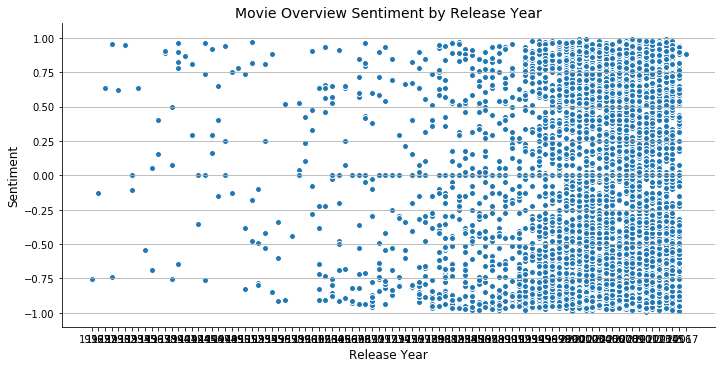

In [7]:
t = sns.pairplot(movies_sentimentyear_df,x_vars="Release Year",y_vars="compound",size=5, aspect=2)
plt.title("Movie Overview Sentiment by Release Year", fontsize=14)
plt.xlabel("Release Year",fontsize=12)
plt.ylabel("Sentiment",fontsize=12)
plt.grid(axis="y")
plt.savefig("sentiment.png")
plt.show()

In [8]:
movies_money_df=movies_df.loc[(movies_df["Average Vote"]>0) & (movies_df["Budget"]>0)& (movies_df["Revenue"]>0),["Title","Release Year", "Budget","Revenue","Average Vote"]]
movies_money_df.describe()


,Budget,Revenue,Average Vote
count,3.227000e+03,3.227000e+03,3227.000000
mean,4.067877e+07,1.213181e+08,6.313263
std,4.439974e+07,1.863361e+08,0.859921
min,1.000000e+00,5.000000e+00,2.300000
25%,1.050000e+07,1.704008e+07,5.800000
50%,2.500000e+07,5.519828e+07,6.300000
75%,5.500000e+07,1.463949e+08,6.900000
max,3.800000e+08,2.787965e+09,8.500000


In [9]:
movies_money_df=movies_money_df.dropna()
movies_money_df.loc[(movies_df["Average Vote"]==0)]
## movies_money_df.describe()

,Title,Release Year,Budget,Revenue,Average Vote


In [10]:
movies_money_df["Years Ago"]=2018-movies_money_df["Release Year"].astype(int)
movies_money_df.head()

,Title,Release Year,Budget,Revenue,Average Vote,Years Ago
0,Avatar,2009,237000000,2787965087,7.2,9
1,Pirates of the Caribbean: At World's End,2007,300000000,961000000,6.9,11
2,Spectre,2015,245000000,880674609,6.3,3
3,The Dark Knight Rises,2012,250000000,1084939099,7.6,6
4,John Carter,2012,260000000,284139100,6.1,6


In [11]:
movies_df["status"].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

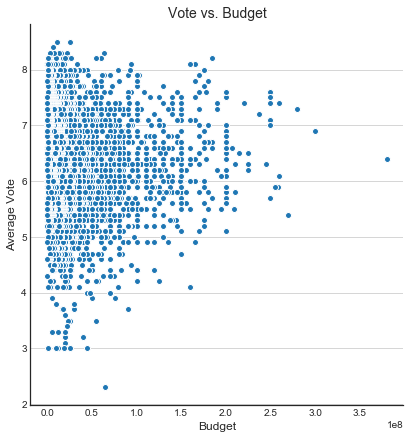

In [46]:
b = sns.pairplot(movies_money_df,x_vars="Budget",y_vars="Average Vote",size=6, aspect=1)
plt.title("Vote vs. Budget", fontsize=14)
plt.xlabel("Budget",fontsize=12)
plt.ylabel("Average Vote",fontsize=12)
plt.grid(axis="y")
plt.savefig("vote-vs-budget.png")
plt.show()

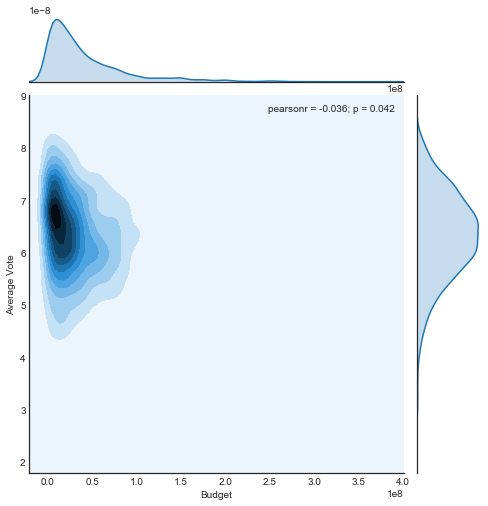

In [52]:
sns.jointplot(x="Budget", y="Average Vote", data=movies_money_df, size=7, kind="kde")
plt.show()

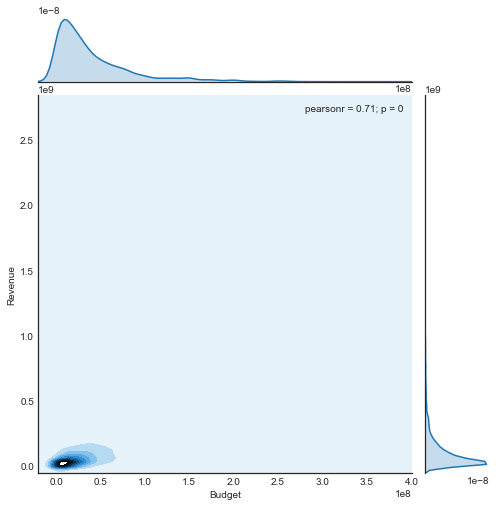

In [60]:
sns.jointplot(x="Budget", y="Revenue", data=movies_money_df, size=7, kind="kde")
plt.show()

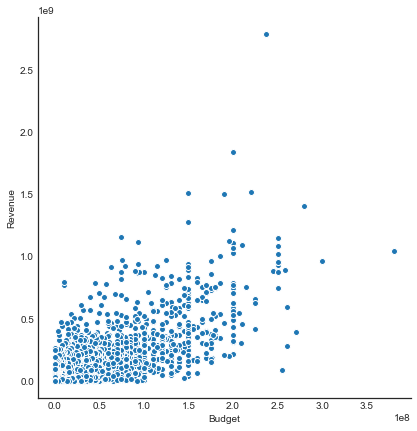

In [61]:
b = sns.pairplot(movies_money_df,x_vars="Budget",y_vars="Revenue",size=6, aspect=1)
plt.show()